# 固体力学第一次作业 求地幔楔中的应力分布

梁康 SA20007903 <lk340621@mail.ustc.edu.cn>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy.ma as ma

In [2]:
x = sp.Symbol('x')
y = sp.Symbol('y')
A = sp.Symbol('A')
B = sp.Symbol('B')
C = sp.Symbol('C')
D = sp.Symbol('D')
mu = sp.Symbol('mu')
U = sp.Symbol('U')
theta = sp.Symbol('theta')

u = -B-D*sp.atan2(y,x)+(C*x+D*y)*(-x/(x**2+y**2))
v = A+C*sp.atan2(y,x)+(C*x+D*y)*(-y/(x**2+y**2))
P = -2*mu*(C*x+D*y)/(x**2+y**2)
tau_xx = sp.simplify(2*mu*sp.diff(u,x))
tau_yy = sp.simplify(2*mu*sp.diff(v,y))
tau_xy = sp.simplify(mu*(sp.diff(u,y)+sp.diff(v,x)))

## 大陆地幔楔

由于水平边界条件，当$y=0,x>0$时，有$u=v=0$,带入方程解得
$$B=-C，A=0$$
且在断层面上，有
$$u(x,y)|_{y=x tan\theta}=Ucos\theta$$
$$v(x,y)|_{y=x tan\theta}=Usin\theta$$
带入运算：

In [3]:
solve1 = sp.solve([B+C,A,y-x*sp.tan(theta),u-U*sp.cos(theta),v-U*sp.sin(theta)],[x,y,A,B,C,D,U])

求得$A,B,C,D$。

In [4]:
A1 = solve1[0][2]
B1 = solve1[0][3]
C1 = solve1[0][4]
D1 = solve1[0][5]

继而可以求出$u,v,P,\tau$。

In [5]:
u1 = u.subs({A:A1,B:B1,C:C1,D:D1,theta:np.pi/6,mu:10**20,U:5})
v1 = v.subs({A:A1,B:B1,C:C1,D:D1,theta:np.pi/6,mu:10**20,U:5})
P1 = P.subs({A:A1,B:B1,C:C1,D:D1,theta:np.pi/6,mu:10**20,U:5})
tau_xx1 = tau_xx.subs({A:A1,B:B1,C:C1,D:D1,theta:np.pi/6,mu:10**20,U:5})
tau_yy1 = tau_yy.subs({A:A1,B:B1,C:C1,D:D1,theta:np.pi/6,mu:10**20,U:5})
tau_xy1 = tau_xy.subs({A:A1,B:B1,C:C1,D:D1,theta:np.pi/6,mu:10**20,U:5})

下面开始做数值解

In [6]:
npf_u1 = sp.lambdify([x,y],u1,"numpy")# numpy function
npf_v1 = sp.lambdify([x,y],v1,"numpy")
npf_P1 = sp.lambdify([x,y],P1,"numpy")
npf_tau_xx1 = sp.lambdify([x,y],tau_xx1,'numpy')
npf_tau_yy1 = sp.lambdify([x,y],tau_yy1,'numpy')
npf_tau_xy1 = sp.lambdify([x,y],tau_xy1,'numpy')

In [7]:
xgrid = np.linspace(-100,200,300)
ygrid = np.linspace(0,300,300)
xxgrid, yygrid = np.meshgrid(xgrid,ygrid)
nd_u1 = npf_u1(xxgrid,yygrid)
nd_u1 = nd_u1.astype(np.float64)
nd_v1 = npf_v1(xxgrid,yygrid)
nd_v1 = nd_v1.astype(np.float64)
nd_P1 = npf_P1(xxgrid,yygrid)
nd_P1 = nd_P1.astype(np.float64)
nd_tau_xx1 = npf_tau_xx1(xxgrid,yygrid)
nd_tau_xx1 = nd_tau_xx1.astype(np.float64)
nd_tau_yy1 = npf_tau_yy1(xxgrid,yygrid)
nd_tau_yy1 = nd_tau_yy1.astype(np.float64)
nd_tau_xy1 = npf_tau_xy1(xxgrid,yygrid)
nd_tau_xy1 = nd_tau_xy1.astype(np.float64)

下面求解主应力和最大剪应力

In [91]:
row,column = nd_P1.shape
nd_principal_strain1 = np.zeros((row,column,2,2),dtype=np.float64)
nd_max_shear_strain1 = np.zeros((row,column),dtype=np.float64)

for j in range(row):
    for i in range(column):
        value,vector = np.linalg.eigh([[nd_tau_xx1[j,i]+nd_P1[j,i],nd_tau_xy1[j,i]],
                              [nd_tau_xy1[j,i],nd_tau_yy1[j,i]+nd_P1[j,i]]])
        nd_principal_strain1[j,i,:,0] = value[0]*vector[:,0]
        nd_principal_strain1[j,i,:,1] = value[1]*vector[:,1]
        nd_max_shear_strain1[j,i] = np.abs(value[0]-value[1])/2

## 大洋地幔楔

大洋地幔楔在断层面上边界条件和大陆地幔楔相同，水平边界上略有不同：
$$u(x,y)|_{x<0,y=0} = -B-D\pi-C=0$$
$$v(x,y)|_{x<0,y=0} = A+C\pi=0$$

求解的过程和大陆地幔楔类似，就不过多叙述了。

In [9]:
solve2 = sp.solve([B+D*sp.pi+C,A+C*sp.pi,y-x*sp.tan(theta),u-U*sp.cos(theta),v-U*sp.sin(theta)],[x,y,A,B,C,D,U])

In [10]:
A2 = solve2[0][2].subs({x:1})
B2 = solve2[0][3].subs({x:1})
C2 = solve2[0][4].subs({x:1})
D2 = solve2[0][5].subs({x:1})

In [11]:
u2 = u.subs({A:A2,B:B2,C:C2,D:D2,theta:np.pi/6,sp.pi:np.pi,mu:10**20,U:5})
v2 = v.subs({A:A2,B:B2,C:C2,D:D2,theta:np.pi/6,sp.pi:np.pi,mu:10**20,U:5})
P2 = P.subs({A:A2,B:B2,C:C2,D:D2,theta:np.pi/6,sp.pi:np.pi,mu:10**20,U:5})
tau_xx2 = tau_xx.subs({A:A2,B:B2,C:C2,D:D2,theta:np.pi/6,sp.pi:np.pi,mu:10**20,U:5})
tau_yy2 = tau_yy.subs({A:A2,B:B2,C:C2,D:D2,theta:np.pi/6,sp.pi:np.pi,mu:10**20,U:5})
tau_xy2 = tau_xy.subs({A:A2,B:B2,C:C2,D:D2,theta:np.pi/6,sp.pi:np.pi,mu:10**20,U:5})

In [12]:
npf_u2 = sp.lambdify([x,y],u2,"numpy")# numpy function
npf_v2 = sp.lambdify([x,y],v2,"numpy")
npf_P2 = sp.lambdify([x,y],P2,"numpy")
npf_tau_xx2 = sp.lambdify([x,y],tau_xx2,'numpy')
npf_tau_yy2 = sp.lambdify([x,y],tau_yy2,'numpy')
npf_tau_xy2 = sp.lambdify([x,y],tau_xy2,'numpy')

In [13]:
nd_u2 = npf_u2(xxgrid,yygrid)
nd_u2 = nd_u2.astype(np.float64)
nd_v2 = npf_v2(xxgrid,yygrid)
nd_v2 = nd_v2.astype(np.float64)
nd_P2 = npf_P2(xxgrid,yygrid)
nd_P2 = nd_P2.astype(np.float64)
nd_tau_xx2 = npf_tau_xx2(xxgrid,yygrid)
nd_tau_xx2 = nd_tau_xx2.astype(np.float64)
nd_tau_yy2 = npf_tau_yy2(xxgrid,yygrid)
nd_tau_yy2 = nd_tau_yy2.astype(np.float64)
nd_tau_xy2 = npf_tau_xy2(xxgrid,yygrid)
nd_tau_xy2 = nd_tau_xy2.astype(np.float64)

In [90]:
nd_principal_strain2 = np.zeros((row,column,2,2),dtype=np.float64)
nd_max_shear_strain2 = np.zeros((row,column),dtype=np.float64)

for j in range(row):
    for i in range(column):
        value,vector = np.linalg.eigh([[nd_tau_xx2[j,i]+nd_P2[j,i],nd_tau_xy2[j,i]],
                              [nd_tau_xy2[j,i],nd_tau_yy2[j,i]+nd_P2[j,i]]])
        nd_principal_strain2[j,i,:,0] = value[0]*vector[:,0]
        nd_principal_strain2[j,i,:,1] = value[1]*vector[:,1]
        nd_max_shear_strain2[j,i] = np.abs(value[0]-value[1])/2

## 画图

In [72]:
plot_nd_u = np.empty_like(nd_P1)
plot_nd_v = np.empty_like(nd_P1)
plot_nd_P = np.empty_like(nd_P1)
plot_nd_max_shear_strain = np.empty_like(nd_P1)
plot_nd_principal_strain = np.empty_like(nd_principal_strain1)

In [92]:
for j in range(row):
    for i in range(column):
        if ygrid[j] < xgrid[i]*np.tan(np.pi/6):
            plot_nd_u[j,i] = nd_u1[j,i]
            plot_nd_v[j,i] = nd_v1[j,i]
            plot_nd_P[j,i] = nd_P1[j,i]
            plot_nd_max_shear_strain[j,i] = nd_max_shear_strain1[j,i]
            plot_nd_principal_strain[j,i:] = nd_principal_strain1[j,i,:]
        else:
            plot_nd_u[j,i] = nd_u2[j,i]
            plot_nd_v[j,i] = nd_v2[j,i]
            plot_nd_P[j,i] = nd_P2[j,i]
            plot_nd_max_shear_strain[j,i] = nd_max_shear_strain2[j,i]
            plot_nd_principal_strain[j,i:] = nd_principal_strain2[j,i,:]

In [93]:
plot_nd_P = plot_nd_P*10**(-5)/(365*24*60*60*10**6) #convert to MPa
plot_nd_max_shear_strain = plot_nd_max_shear_strain*10**(-5)/(365*24*60*60*10**6)
plot_nd_principal_strain = plot_nd_principal_strain*10**(-5)/(365*24*60*60*10**6)

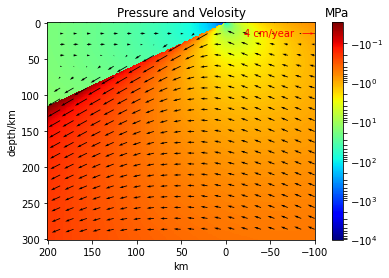

In [99]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
img11 = ax1.pcolormesh(xxgrid,yygrid,
                       plot_nd_P,
                       cmap='jet',shading='auto',
#                       vmin = -100,
                       norm=colors.SymLogNorm(base=10,linthresh=0.1),
                       )
cbar1 = fig1.colorbar(img11)
cbar1.ax.set_title("MPa")
img12 = ax1.quiver(xgrid[::15],ygrid[::15],
                   -plot_nd_u[::15,::15],-plot_nd_v[::15,::15],)
# "-" for invert axis
img12_qv = ax1.quiverkey(img12,0.95,0.95,4,'4 cm/year',
                         color = 'red',
                         labelcolor = 'red',
                         labelpos='W',coordinates='axes')
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set(xlabel='km',ylabel='depth/km',
        title='Pressure and Velosity')
#ax1.xaxis.set_label_position('top')
#ax1.xaxis.set_ticks_position('top')
fig1.savefig('1.pdf')

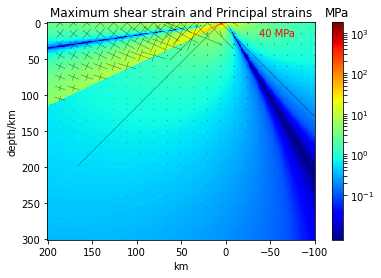

In [100]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
img21 = ax2.pcolormesh(xxgrid,yygrid,
                       plot_nd_max_shear_strain,
                       cmap='jet',shading='auto',
                       norm=colors.SymLogNorm(base=10,linthresh=0.1),
                      )
cbar2 = fig2.colorbar(img21)
cbar2.ax.set_title("MPa")
img22 = ax2.quiver(xgrid[::15],ygrid[::15],
                   -plot_nd_principal_strain[::15,::15,0,0],
                   -plot_nd_principal_strain[::15,::15,1,0],
                   width=0.001,
                   scale=1000,
                   headlength=0,
                   headwidth=0,
                   headaxislength=0,)
img23 = ax2.quiver(xgrid[::15],ygrid[::15],
                   plot_nd_principal_strain[::15,::15,0,0],
                   plot_nd_principal_strain[::15,::15,1,0],
                   width=0.001,
                   scale=1000,
                   headlength=0,
                   headwidth=0,
                   headaxislength=0,)
img24 = ax2.quiver(xgrid[::15],ygrid[::15],
                   -plot_nd_principal_strain[::15,::15,0,1],
                   -plot_nd_principal_strain[::15,::15,1,1],
                   width=0.001,
                   scale=1000,
                   headlength=0,
                   headwidth=0,
                   headaxislength=0,)
img25 = ax2.quiver(xgrid[::15],ygrid[::15],
                   plot_nd_principal_strain[::15,::15,0,1],
                   plot_nd_principal_strain[::15,::15,1,1],
                   width=0.001,
                   scale=1000,
                   headlength=0,
                   headwidth=0,
                   headaxislength=0,)
# "-" for invert axis
img22_qk = ax2.quiverkey(img22,0.95,0.95,40,'40 MPa',
                         color = 'red',
                         labelcolor = 'red',
                         labelpos='W',coordinates='axes')

ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set(xlabel='km',ylabel='depth/km',
        title='Maximum shear strain and Principal strains')
#ax1.xaxis.set_label_position('top')
#ax1.xaxis.set_ticks_position('top')
fig2.savefig('2.pdf')